### Kaggle Link
https://www.kaggle.com/c/titanic

### Competition Description
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Data Dictionary

| Variable  |    Definition       | Key   |
|-----------|:-------------------:|------:|
| survival  | Survival            | 0 = No, 1 = Yes           |
| pclass    | Ticket class        | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex       | Sex                 |       |
| Age       | Age in years        |       |
| sibsp     | # of siblings / spouses aboard the Titanic      |       |
| parch     | # of parents / children aboard the Titanic      |       |
| ticket    | Ticket number       |       |
| fare      | Passanger fare      |       |
| cabin     | Cabin number        |       |
| embarked  | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Data Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv('../Data/Kaggle/titanic_train.csv')
df_valid = pd.read_csv('../Data/Kaggle/titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_valid.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


First things first, let's drop some meaningless variables. But let's save the ID for the submission.

In [7]:
df_ids = df_valid['PassengerId']
for df in [df_train, df_valid]:
    df.drop(['PassengerId'], axis=1, inplace=True)

### First Look at the Data

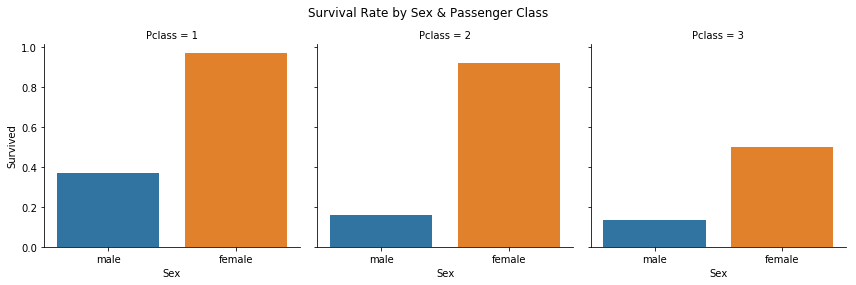

In [8]:
g = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Passenger Class')

It's easy to note a that the majority of the survivors were women. Also, most of them, for both gender, were concentrated in `Pclass = 1`.

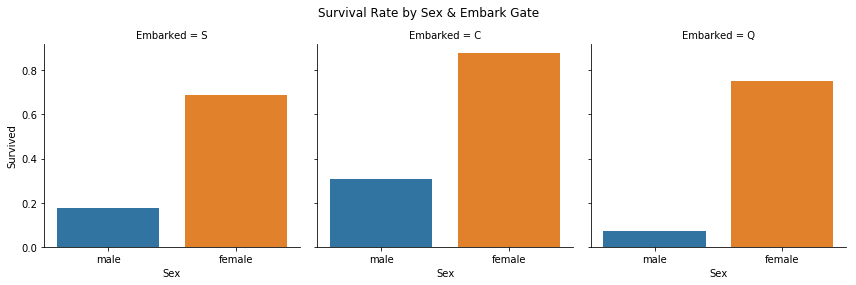

In [9]:
g = sns.factorplot(x='Sex', y='Survived', col='Embarked', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Embark Gate')

Here we can notice that for both men and women, the majority of survivors had `Embark = C`.

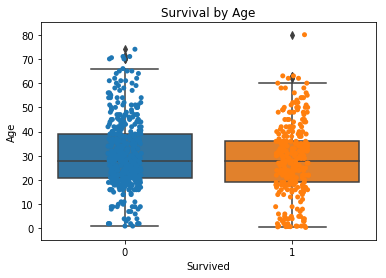

In [10]:
g = sns.boxplot(x='Survived', y='Age', data=df_train)
g = sns.stripplot(x='Survived', y='Age', data=df_train, jitter=True, edgecolor='gray')
plt.title('Survival by Age')

Here we can see that, in general, the age doesn't say much about the chance of surviving or not. However, we can see that most of the oldest people died.

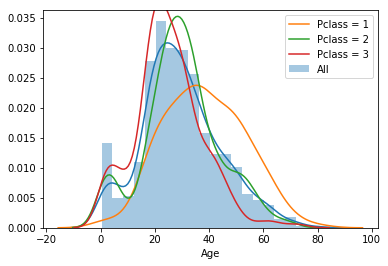

In [11]:
sns.distplot(df_train['Age'].dropna(), label='All')
sns.distplot(df_train[df_train['Pclass'] == 1]['Age'].dropna(), hist=False, label='Pclass = 1')
sns.distplot(df_train[df_train['Pclass'] == 2]['Age'].dropna(), hist=False, label='Pclass = 2')
sns.distplot(df_train[df_train['Pclass'] == 3]['Age'].dropna(), hist=False, label='Pclass = 3')

As the plot above shows, the age distribution among `Pclass` are similar, most of the people being middle-aged.

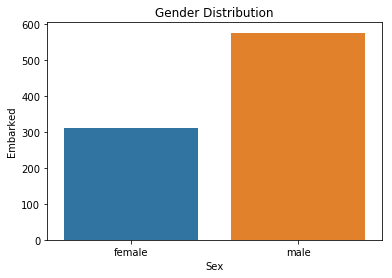

In [12]:
s = df_train.groupby(['Sex'], as_index=False)['Embarked'].count()
sns.barplot(x='Sex', y='Embarked', data=s)
plt.title('Gender Distribution')

### Feature Engineering & Data Cleaning

In [13]:
df_both = pd.concat([df_train, df_valid])

* Features `Cabin`, `Age` and `Emabarked` have some missing values.
    * NaN `Cabin` will be filled according to the median value given the `Pclass` feature value
    * NaN `Age` will be filled according to its median value across the data set
    * NaN `Embarked` will be filled according to the median value given the `Pclass` feature value
    * NaN `Fare` will be filled according to its median and transformed to `int`
    * `Ticket` will be replaced by its first letter, indicative of the its placement
    
However, some pre-processing have to be done. First, for the `Cabin` feature, let's keep just the letter.

In [14]:
for df in [df_train, df_valid]: 
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else x)

Now we are going to fill NaN values as specified above.

In [15]:
df_both = df_both.groupby(by=['Pclass', 'Cabin', 'Embarked'])['Sex'].count().to_frame().reset_index()

In [16]:
df_both = df_both.sort_values(['Sex', 'Pclass'], ascending=False).groupby(['Pclass']).first().reset_index()

In [17]:
df_both

,Pclass,Cabin,Embarked,Sex
0,1,C23 C25 C27,S,6
1,2,F2,S,4
2,3,G6,S,5


In [18]:
for df in [df_train, df_valid]:
    # Filling 'Cabin' according to 'Pclass'
    df.loc[(df['Pclass'] == 1) & (df['Cabin'].isnull()), 'Cabin'] = 'C'
    df.loc[(df['Pclass'] == 2) & (df['Cabin'].isnull()), 'Cabin'] = 'F'
    df.loc[(df['Pclass'] == 3) & (df['Cabin'].isnull()), 'Cabin'] = 'G'
    # Filling 'Embarked' according to 'Pclass'
    df['Embarked'].fillna('S', inplace=True)
    # Filling 'Age' by its median
    df['Age'].fillna(df['Age'].median(), inplace=True)
    # Filling 'Fare' by its median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Fare'] = df['Fare'].apply(lambda x: int(x))

In [19]:
for df in [df_train, df_valid]:
    df['Ticket'] = df['Ticket'].apply(lambda x: str(x)[0])

Next, let's transform the `Age` feature into category.

In [20]:
for df in [df_train, df_valid]:
    # Categorizing 'Ages'
    bins = (0, 5, 12, 18, 25, 35, 60, 120)
    names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=names)
    df['Age'] = categories

Now, let's perform some feature engineering. We are going to create three new features: 

* `FamilySize` is going to be given by the sum of `SibSp` and `Parch + 1`
* `IsAlone` is gonna be `1` if `FamilySize == 1` 
* `Title` is going to be the first string after the comma in the `Name` field
* `NameLen` is going to be given by the surname lenght

In [21]:
for df in [df_train, df_valid]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [22]:
for df in [df_train, df_valid]:    
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [23]:
for df in [df_train, df_valid]:    
    df['Title'] = df['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()
    
    df.loc[df['Title'].isin(['Lady', 'the Countess', 'Dona']), 'Title'] = 'Royalty'
    df.loc[df['Title'].isin(['Mme']), 'Title'] = 'Mrs'
    df.loc[df['Title'].isin(['Mlle','Ms']), 'Title'] = 'Miss'
    df.loc[df['Title'].isin(['Capt', 'Col', 'Major','Rev']), 'Title'] = 'Officer'
    df.loc[df['Title'].isin(['Jonkheer', 'Don','Sir']), 'Title'] = 'Royalty'
    df.loc[(df['Sex'] == 'male')   & (df['Title'] == 'Dr'),'Title'] = 'Mr'
    df.loc[(df['Sex'] == 'female') & (df['Title'] == 'Dr'),'Title'] = 'Mrs'

In [24]:
for df in [df_train, df_valid]:    
     df['NameLen'] = df['Name'].apply(lambda x: len(str(x)))

Now, let's drop `Name`, `Parch` and `SibSp`.

In [25]:
for df in [df_train, df_valid]:  
    df.drop(['Parch', 'SibSp', 'Name'], axis=1, inplace=True)

In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,3,male,Student,A,7,G,S,2,0,Mr,23
1,1,1,female,Adult,P,71,C,C,2,0,Mrs,51
2,1,3,female,Young Adult,S,7,G,S,1,1,Miss,22
3,1,1,female,Young Adult,1,53,C,S,2,0,Mrs,44
4,0,3,male,Young Adult,3,8,G,S,1,1,Mr,24


### Digging Deeper

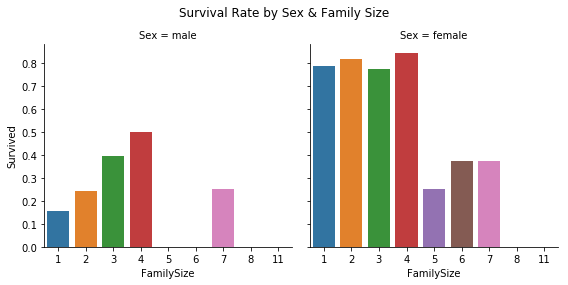

In [27]:
g = sns.factorplot(x='FamilySize', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survival Rate by Sex & Family Size')

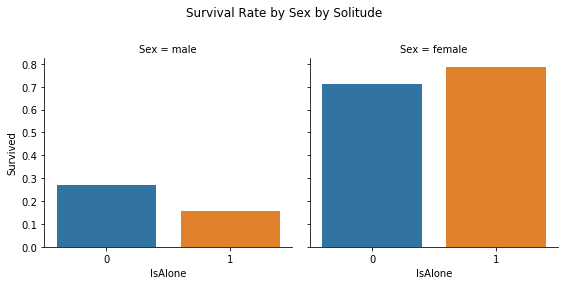

In [28]:
g = sns.factorplot(x='IsAlone', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival Rate by Sex by Solitude')

There are more men, however, more women survived.

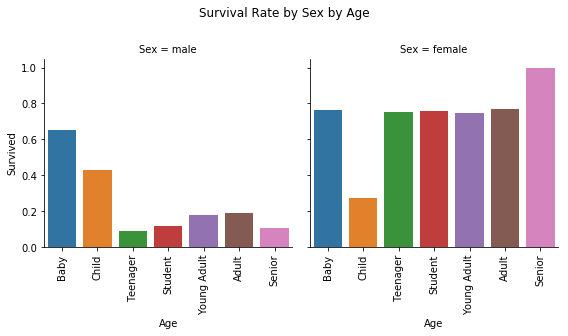

In [29]:
g = sns.factorplot(x='Age', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.8)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Survival Rate by Sex by Age')

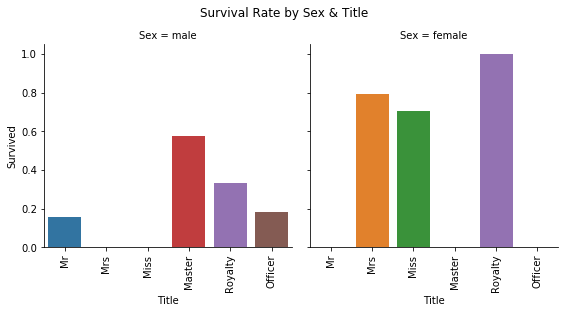

In [30]:
g = sns.factorplot(x='Title', y='Survived', col='Sex', data=df_train, kind='bar', ci=None)
plt.subplots_adjust(top=0.85)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Survival Rate by Sex & Title')

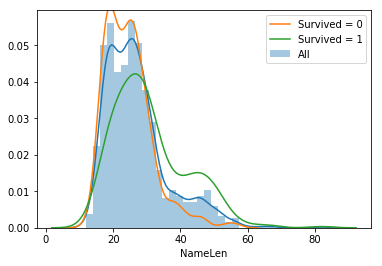

In [31]:
sns.distplot(df_train['NameLen'], label='All')
sns.distplot(df_train[df_train['Survived'] == 0]['NameLen'], hist=False, label='Survived = 0')
sns.distplot(df_train[df_train['Survived'] == 1]['NameLen'], hist=False, label='Survived = 1')

In [32]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,3,male,Student,A,7,G,S,2,0,Mr,23
1,1,1,female,Adult,P,71,C,C,2,0,Mrs,51
2,1,3,female,Young Adult,S,7,G,S,1,1,Miss,22
3,1,1,female,Young Adult,1,53,C,S,2,0,Mrs,44
4,0,3,male,Young Adult,3,8,G,S,1,1,Mr,24


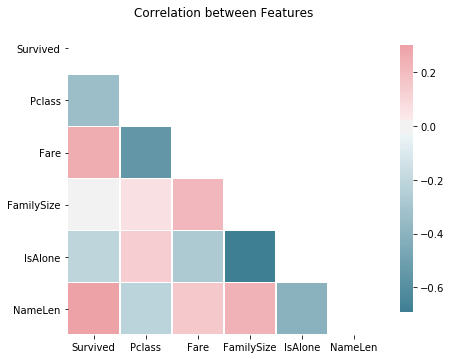

In [33]:
corr = df_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(7, 7))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation between Features')

I's easy to observe a positive correlation between both the name lenght and the fare with the survival outcome.

### Converting Categorical Features to Numeric

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

categorical = ['Sex', 'Age', 'Ticket', 'Cabin', 'Embarked', 'Title']

for df in [df_train, df_valid]:
    for cat in categorical:
        df[cat] = le.fit_transform(df[cat])
        print(le.classes_)
        print(le.transform(le.classes_))

['female' 'male']
[0 1]
['Adult' 'Baby' 'Child' 'Senior' 'Student' 'Teenager' 'Young Adult']
[0 1 2 3 4 5 6]
['1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'C' 'F' 'L' 'P' 'S' 'W']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
[0 1 2 3 4 5 6 7]
['C' 'Q' 'S']
[0 1 2]
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
[0 1 2 3 4 5]
['female' 'male']
[0 1]
['Adult' 'Baby' 'Child' 'Senior' 'Student' 'Teenager' 'Young Adult']
[0 1 2 3 4 5 6]
['1' '2' '3' '4' '6' '7' '9' 'A' 'C' 'F' 'L' 'P' 'S' 'W']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
['A' 'B' 'C' 'D' 'E' 'F' 'G']
[0 1 2 3 4 5 6]
['C' 'Q' 'S']
[0 1 2]
['Master' 'Miss' 'Mr' 'Mrs' 'Officer' 'Royalty']
[0 1 2 3 4 5]


In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,NameLen
0,0,3,1,4,9,7,6,2,2,0,2,23
1,1,1,0,0,13,71,2,0,2,0,3,51
2,1,3,0,6,14,7,6,2,1,1,1,22
3,1,1,0,6,0,53,2,2,2,0,3,44
4,0,3,1,6,2,8,6,2,1,1,2,24


### Testing Models

Because we are working with categorical data, I'll try the Random Forest, Decision Tree and Gradient Boosting Classifies. To make use of linear models, it is a **MUST** to apply the pandas `get_dummies` method on the categorical features.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [38]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_valid = df_valid

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [40]:
def plot_importances(clf, features):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()

In [41]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [42]:
scores = cross_val_score(clf_rf, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.13)


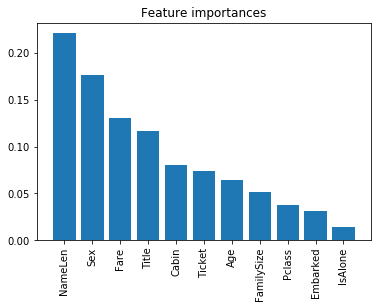

In [43]:
plot_importances(clf_rf, X_train.columns.values)

In [44]:
y_pred = clf_rf.predict(X_valid)

In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
scores = cross_val_score(clf_dt, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.21)


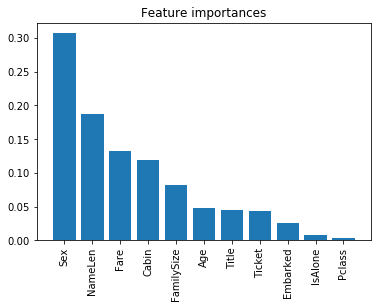

In [47]:
plot_importances(clf_dt, X_train.columns.values)

In [48]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [49]:
scores = cross_val_score(clf_gb, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.15)


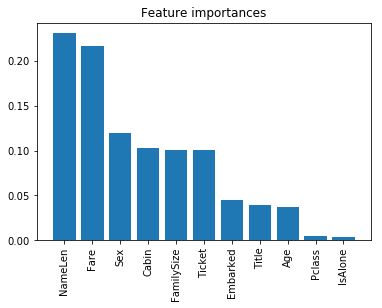

In [50]:
plot_importances(clf_gb, X_train.columns.values)

In [51]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier

clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [52]:
scores = cross_val_score(clf_ab, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.11)


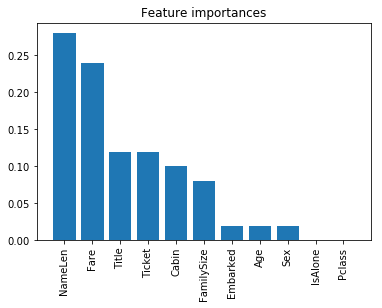

In [53]:
plot_importances(clf_ab, X_train.columns.values)

### Scoring and Voting

In [54]:
from sklearn.ensemble import VotingClassifier

clf_vc = VotingClassifier(estimators=[('rf', clf_rf), ('gb', clf_gb), ('ab', clf_ab)], voting='soft')
clf_vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         n_jobs=1, voting='hard', weights=None)

In [55]:
scores = cross_val_score(clf_vc, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.15)


In [56]:
y_pred = clf_vc.predict(X_valid)

In [57]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred})
submission.to_csv('titanic-output.csv', index=False)

### XGBoost

In [1]:
import xgboost as xgb

from sklearn.grid_search import GridSearchCV

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [59]:
model = xgb.XGBClassifier(silent=1)
model_params = {
    'n_estimators':       [50, 100, 200, 300],
    'learning_rate':      [0.05, 0.1, 0.5],
    'max_depth':          [2, 3, 5, 10],
    'min_child_weight':   [1, 3, 5, 7],
    'subsample':          [0.3, 0.5, 0.8, 1.0],
    'colsample_bytree':   [0.3, 0.5, 0.7, 1.0],
    'colsample_bylevel':  [0.5, 0.7, 1.0]
}

grid = GridSearchCV(model, model_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2460 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 4560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7260 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 10560 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 13530 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 15780 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 18330 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 21180 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 24330 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 27780 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 31530 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 35580 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 39930 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 44047 tasks      | 

{'colsample_bylevel': 0.7, 'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.5}


In [60]:
model = xgb.XGBClassifier(silent=1, colsample_bylevel=0.7, colsample_bytree=0.3, learning_rate=0.05, 
                          max_depth=2, min_child_weight=1, n_estimators=300, subsample=0.5).fit(X_train, y_train)

In [61]:
scores = cross_val_score(model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.15)


In [62]:
y_pred = model.predict(X_valid)

In [63]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred})
submission.to_csv('titanic-output.csv', index=False)

### Neural Network

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [59]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

In [60]:
from sklearn.preprocessing import StandardScaler

categorical.append('Pclass')

train_objs_num = len(X_train)
test_objs_num =  len(X_test)
dataset = pd.concat(objs=[X_train, X_test, X_valid], axis=0)
for df in [df_train, df_valid]:    
    scaler = StandardScaler().fit(dataset[['Fare', 'NameLen']])
    dataset[['Fare', 'NameLen']] = scaler.transform(dataset[['Fare', 'NameLen']])
    
dataset = pd.get_dummies(columns=categorical, data=dataset)

X_train = dataset[:train_objs_num+test_objs_num]
X_valid = dataset[train_objs_num+test_objs_num:]

In [61]:
X_train.head()

,Fare,FamilySize,IsAlone,NameLen,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,...,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_1,Pclass_2,Pclass_3
140,-0.345154,3,0,0.196716,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
439,-0.441810,1,1,1.143798,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
817,0.080130,3,0,-0.960829,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
378,-0.557796,1,1,-0.855598,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
491,-0.499803,1,1,-0.855598,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [62]:
y_train = pd.concat(objs=[y_train, y_test], axis=0)

In [81]:
model = Sequential()
model.add(Dense(200, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(150))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 200)               10000     
_________________________________________________________________
batch_normalization_10 (Batc (None, 200)               800       
_________________________________________________________________
activation_10 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 150)               30150     
_________________________________________________________________
batch_normalization_11 (Batc (None, 150)               600       
_________________________________________________________________
activation_11 (Activation)   (None, 150)               0         
__________

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, batch_size=128, epochs=100, verbose=0, validation_split=0.2)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


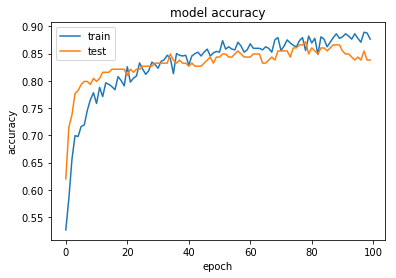

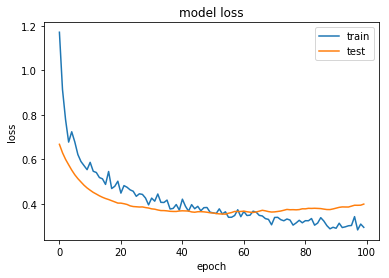

In [83]:
plot_history(hist)

In [84]:
print('Training accuracy: %.2f%% / Validation accuracy: %.2f%%' % (100*hist.history['acc'][-1], 100*hist.history['val_acc'][-1]))

Training accuracy: 87.64% / Validation accuracy: 83.80%


In [85]:
y_pred = model.predict_classes(X_valid.values)

 32/418 [=>............................] - ETA: 3s

In [86]:
submission = pd.DataFrame({'PassengerId': df_ids, 'Survived': y_pred.flatten()})
submission.to_csv('titanic-output.csv', index=False)